<h1>How can we control the increasing number of accidents in New York?</h1>

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

<h2>Introduction</h2>

<p><strong>Business Context.</strong> The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). </p>
<p>The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.</p>

<p><strong>Business Problem.</strong> Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.</p>

<p><strong>Analytical Context.</strong> You are given a CSV file (stored in the already created <code>data</code> folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is <code>;</code> instead of the default <code>,</code>. You will be performing the following tasks on the data:</p>
<ol>
<li>Extract additional borough data stored in a JSON file</li>
<li>Read, transform, and prepare data for visualization</li>
<li>Perform analytics and construct visualizations of the data to identify patterns in the dataset</li>
</ol>
<p>The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:</p>
<ol>
<li>How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?</li>
<li>For any particular day, during which hours are accidents most likely to occur?</li>
<li>Are there more accidents on weekdays than weekends?</li>
<li>What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?</li>
<li>For each borough, during which hours are accidents most likely to occur?</li>
<li>What are the top 5 causes of accidents in the city? </li>
<li>What types of vehicles are most involved in accidents per borough?</li>
<li>What types of vehicles are most involved in deaths?</li>
</ol>

<h2>Fetching the relevant data</h2>

<p>The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the <code>data</code> folder.</p>

<h3>Question :</h3>
<p>Use the function <code>json.load()</code> to load the file <code>borough_data.json</code> as a dictionary.</p>

**Answer.**

In [3]:
with open('data/borough_data.json') as f:
    borough_data = json.load(f)
    
borough_data

{'the bronx': {'name': 'the bronx', 'population': 1471160.0, 'area': 42.1},
 'brooklyn': {'name': 'brooklyn', 'population': 2648771.0, 'area': 70.82},
 'manhattan': {'name': 'manhattan', 'population': 1664727.0, 'area': 22.83},
 'queens': {'name': 'queens', 'population': 2358582.0, 'area': 108.53},
 'staten island': {'name': 'staten island',
  'population': 479458.0,
  'area': 58.37}}

<h3>Question :</h3>
<p>Similarly, use the pandas function <code>read_csv()</code> to load the file <code>accidents.csv</code> as a DataFrame. Name this DataFrame <code>df</code>. </p>

**Answer.**

In [4]:
df = pd.read_csv('data/accidents.csv', sep=';')

df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN


<h2>Overview of the data</h2>

<p>Let's go through the columns present in the dataframe:</p>

In [6]:
df.columns

Index(['DATE', 'TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE', 'LONGITUDE',
       'ON STREET NAME', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

<p>We have the following columns</p>
<ol>
<li><strong>BOROUGH</strong>: The borough in which the accident occured</li>
<li><strong>COLLISION_ID</strong>: A unique identifier for this collision</li>
<li><strong>CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)</strong>: Reasons for the accident</li>
<li><strong>CROSS STREET NAME</strong>: Nearest cross street to the place of accidents</li>
<li><strong>DATE</strong>: Date of the accident</li>
<li><strong>TIME</strong>: Time of accident</li>
<li><strong>LATITUDE</strong>: Latitude of the accident</li>
<li><strong>LONGITUDE</strong>: Longitude of the accident</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED</strong>: Category wise injury</li>
<li><strong>NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED</strong>: Category wise death</li>
<li><strong>ON STREET NAME</strong>: Street where the accident occured</li>
<li><strong>VEHICLE TYPE CODE (1, 2, 3, 4, 5)</strong>: Types of vehicles involved in the accident</li>
<li><strong>ZIP CODE</strong>: zip code of the accident location</li>
</ol>

<h3>Exercise 1 :</h3>
<p>Since 2014, New York City has been implementing a road safety plan named <a href="https://www1.nyc.gov/content/visionzero/pages/">Vision Zero</a>. It aims to reduce the number of traffic deaths to <em>zero</em> by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:</p>
<ul>
<li>[ ] Automated pedestrian detection</li>
<li>[ ] Road safety audits at high risk locations</li>
<li>[ ] Expansion in the cycle track network</li>
<li>[ ] Targeted education and awareness initiatives</li>
<li>[ ] Creation of pedestrian refuge islands</li>
<li>[ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>
</ul>
<p>Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.</p>
<p><strong>Note:</strong> You can create check marks by double-clicking this cell and adding an <code>[x]</code> in the corresponding lines. </p>

**Answer.**

<li>[ ] Automated pedestrian detection</li>
<li>[x] Road safety audits at high risk locations</li>
<li>[x] Expansion in the cycle track network</li>
<li>[x] Targeted education and awareness initiatives</li>
<li>[x] Creation of pedestrian refuge islands</li>
<li>[x] Launch Integrated Data-Driven Speed Reducer Program (speed humps &amp; speed cushions)</li>

<p>Let's go ahead and answer each of the client's questions.</p>

<h2>Answering the client's questions</h2>

<h3>Exercise 2 :</h3>
<p>Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?</p>
<p><strong>Hint</strong>: You may find the pandas functions <code>to_datetime()</code> and <code>dt.to_period()</code> useful.</p>

**Answer.**

In [7]:
df.dtypes #checking the dtypes within the dataframe

DATE                              object
TIME                              object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
ON STREET NAME                    object
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE CODE 1               object
VEHICLE TYPE CODE 2               object
VEHICLE TYPE CODE 3               object
VEHICLE TYPE CODE 4               object
VEHICLE TYPE CODE 5               object
dtype: object

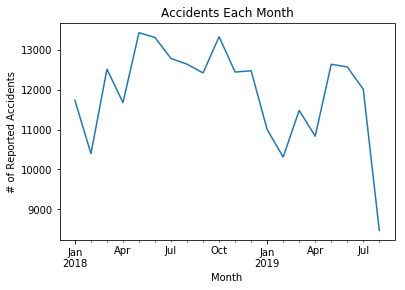

In [9]:
df['DATE'] = pd.to_datetime(df['DATE']) #convert DATE to datetime
monthly_accidents = df.groupby(df['DATE'].dt.to_period(freq='M')).size() #create variable monthly_accidents that groups the dataframe by the month indicated in the date field and take the size of each group
monthly_accidents.plot.line() #plot the monthly_accidents table on a line chart
plt.title('Accidents Each Month') #set title for chart
plt.xlabel('Month') #set xlabel for chart
plt.ylabel('# of Reported Accidents') #set ylabel for chart
plt.show() #show the chart

<h3>Exercise 3 :</h3>
<p>From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?</p>

**Answer.**

January, February, and April have the **least** number of accidents. I believe this is likely due to decreased travel during these months (minimal holidays and vacations). 

<h3>Exercise 4 :</h3>
<p>How does the number of accidents vary throughout a single day? Create a new column <code>HOUR</code> based on the data from the <code>TIME</code> column, then plot a bar graph of the distribution per hour throughout the day.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.hour</code> useful. </p>

**Answer.**

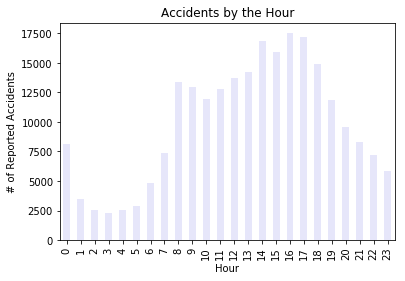

In [11]:
df['TIME'] = pd.to_datetime(df['TIME']) #convert dtype for time column to datetime
df['HOUR'] = df['TIME'].dt.hour #create column 'HOUR' to capture the hour time from the time column
hourly_accidents = df.groupby(df['HOUR']).size() #group the df by 'HOUR' size/freq of occurance 
hourly_accidents.plot.bar(color='lavender') #plot bar chart
plt.title('Accidents by the Hour') #add title
plt.xlabel('Hour') #label x axis
plt.ylabel('# of Reported Accidents') #label y axis
plt.xticks(range(0,24)) #set tick locations to reflect hour range 
plt.show() #show bar plot

<p>From this, we see that more accidents occur in the afternoon (2 - 6 PM) than at other times of day.</p>

<h3>Exercise 5 :</h3>
<p>In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?</p>

**Answer.**

Without knowing the dates or location, these observations aren't useful in deriving many insights much less they do not provide clear guidance that would inform the policies being considered by the state of NY. For example, while we're aware most accidents take place in the afternoon that may not necessarily be true for all locations and wouldn't be sufficient to inform where a policy such as a pedestrian island would be most useful.

<h3>Exercise 6 :</h3>
<p>How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.</p>
<p><strong>Hint:</strong> You may find the function <code>dt.weekday</code> useful.</p>

**Answer.**

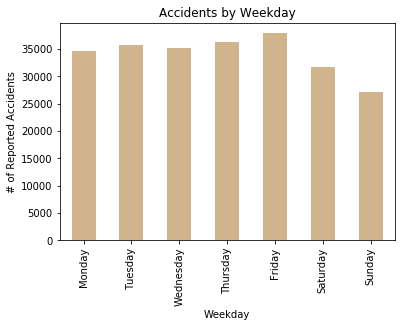

In [11]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday'] #create list of ordered weekdays to reindex chart
weekday_accidents = df.groupby(df['DATE'].dt.weekday_name).size().reindex(weekdays) #convert DATE to weekdays, group by week day and freq/size of accidents, and reindex days of the week in order
weekday_accidents.plot.bar(color = 'tan') #plot bar graph of accidents by weekday
plt.title('Accidents by Weekday') #add title
plt.xlabel('Weekday') #label x axis
plt.ylabel('# of Reported Accidents') #label y axis
plt.show() #display the chart

<h3>Exercise 7 :</h3>
<p>Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?</p>
<p><strong>Hint:</strong> You may want to update some of the keys in the borough dictionary to match the names in the dataframe. </p>

<font color='pink'> **ANSWER PART I REPORTED ACCIDENTS BY BOROUGH (GRAPH)** </font>

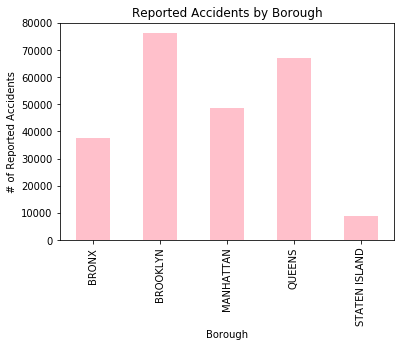

In [12]:
#Part 1
borough_accidents = df.groupby('BOROUGH').size() #create variable to group df by borough and freq/size of instances in df
borough_accidents.plot.bar(color = 'pink') #plot bar chart of results; pink is for style 
plt.title('Reported Accidents by Borough') #add title
plt.xlabel('Borough') #label x axis
plt.ylabel('# of Reported Accidents') #label y axis
plt.show() #display the chart

<font color='teal'> **ANSWER PART II REPORTED ACCIDENTS PER SQ. MILE BY BOROUGH (GRAPH)** </font>

,area,population,rep_accidents,accidents_by_sqmile
BOROUGH,,,,
BRONX,42.1,1.47116e+06,37709,895.701
BROOKLYN,70.82,2.64877e+06,76253,1076.72
MANHATTAN,22.83,1.66473e+06,48749,2135.3
QUEENS,108.53,2.35858e+06,67120,618.447
STATEN ISLAND,58.37,479458,8691,148.895


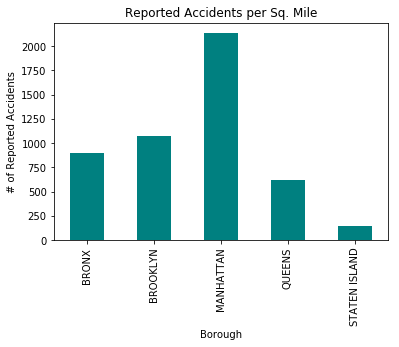

In [14]:
#Part 2
borough_copy = borough_data.copy() #make copy of the borough data for analysis
borough_copy.update({k.upper():v for k, v in borough_copy.items()}) #convert dict_keys to upper case
rem_list = ['the bronx', 'brooklyn', 'manhattan', 'queens', 'staten island'] #above value duplicated dict, so this list serves to remove duplicated old values in the below function
borough_copy = dict([(key, val) for key, val in borough_copy.items() #remove old key values that were duplicated
                    if key not in rem_list])
new_df = pd.DataFrame(borough_copy) #convert dict to dataframe
new_df = new_df.rename(columns = {'THE BRONX':'BRONX'}) #rename column to match accident df
new_df = new_df.drop(['name']) #drop name column
new_df = new_df.T #transpose table so locations are index
new_df.index.name = 'BOROUGH'#name index col 'BOROUGH'

new_df['rep_accidents'] = borough_accidents #create new column to bring in accident data
new_df['accidents_by_sqmile'] = new_df['rep_accidents']/new_df['area'] #create new column to calculate and display accidents by sq mile
display(new_df)
new_df.plot.bar(y='accidents_by_sqmile', color='teal', legend=None) #plot bar chart
plt.title('Reported Accidents per Sq. Mile') #add title
plt.xlabel('Borough') #label x axis
plt.ylabel('# of Reported Accidents') #label y axis
plt.show() #display chart


<h4>**ANSWER PART III RESPONSE**</h4>

***What can you conclude?***

Although Brooklyn experienced the highest total volume of reported accidents, Manhattan had the highest overall concentration per sq. foot. In analyzing the area and population data alongside the # of reported accidents, it's fair to attribute/expect higher accident numbers (overall) for Queens and Brooklyn (due) to their larger populations and area size. Given the domain knowledge I have about New York, Manhattan's high accidents per sq. mile isn't surprising given that it's a hub for many major businesses/shops in NYC. 

<h3>Exercise 8 :</h3>
<p>Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.</p>
<p><strong>Hint:</strong> You can use <code>sns.FacetGrid</code> to create a grid of plots with the hourly data of each borough. </p>

**Answer.**

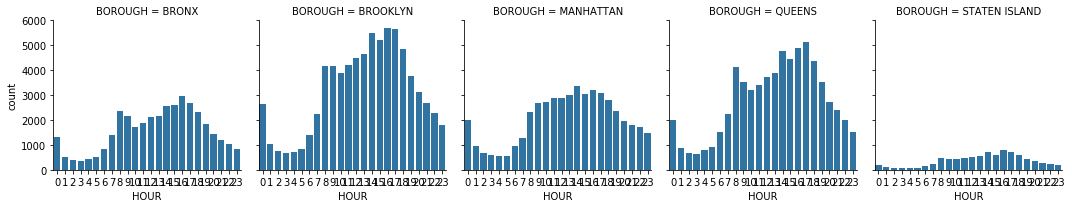

In [48]:
hourly_accidents = pd.DataFrame({'count': df.groupby(['BOROUGH','HOUR']).size()}) #create DF of dict that displays count of accidents grouped by borough and hour
hourly_accidents = hourly_accidents.reset_index() #reset index

g = sns.FacetGrid(hourly_accidents, col='BOROUGH') #create plot for grids for each borough
g.map(sns.barplot, 'HOUR', 'count', order=None) #add data to chart

<p><strong>Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?</strong></p>

**RESPONSE**
The number of accidents generally mirrors similar behaviors with the highest concentration still falling between 2-6PM, but it's worth noting that the accident totals are relatively the same throughout all hours for Manhattan, the Bronx, and Staten Island with Staten Island having the lowest overall number of accidents(which is consistent with the above charts segmented by borough).

<p>We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.</p>

<h3>Exercise 9 :</h3>
<p>What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. </p>
<p><strong>Hint:</strong> One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions <code>pd.concat()</code> and  <code>reset_index()</code>. Then, use an appropiate <code>group_by</code> to count the number of repetitions of contributed factors per accident.   </p>

In [5]:
df_copy = df.copy() #create copy of df (note: I should've done this earlier on in the notebook)
#create a dataframe that concatenates all five contributing factors vertically
df_factors = pd.concat([df_copy['CONTRIBUTING FACTOR VEHICLE 1'], 
                      df_copy['CONTRIBUTING FACTOR VEHICLE 2'],
                      df_copy['CONTRIBUTING FACTOR VEHICLE 3'],
                      df_copy['CONTRIBUTING FACTOR VEHICLE 4'],
                      df_copy['CONTRIBUTING FACTOR VEHICLE 5']], axis = 0, join = 'inner')


#replace NaN's with 'Unspecified'
df_factors = pd.DataFrame(df_factors).fillna('Unspecified')

#reset index and rename column to 'Factors'
df_factors = df_factors.reset_index().rename(columns={0:'Factors'})
df_factors

#group df to count the number of occurences by factor 
df_factors_grouped = df_factors.groupby('Factors')['Factors'].count().sort_values(ascending = False)
df_factors_grouped.head(2)

Factors
Unspecified                       979902
Driver Inattention/Distraction     72203
Name: Factors, dtype: int64

**RESPONSE**

It appears that for most (max) accidents, the contributing factor was unspecified. However, in instances where the contributing factor(s) were specified, Driver Inattention/Distration was the leading factor.

<h3>Exercise 10 :</h3>
<p>Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. </p>
<p><strong>Hint:</strong> You can apply a similar approach to the one used in the previous question.</p>

BRONX
VT
station wagon/sport utility vehicle    37693
sedan                                  19652
passenger vehicle                       4941
pick-up truck                           2093
taxi                                    2058
Name: VT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


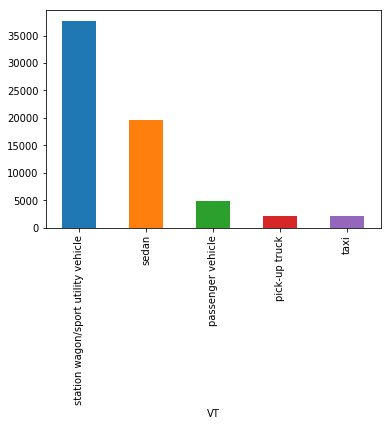

NEXT

BROOKLYN
VT
station wagon/sport utility vehicle    76205
sedan                                  39459
passenger vehicle                      10177
pick-up truck                           3986
taxi                                    2754
Name: VT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


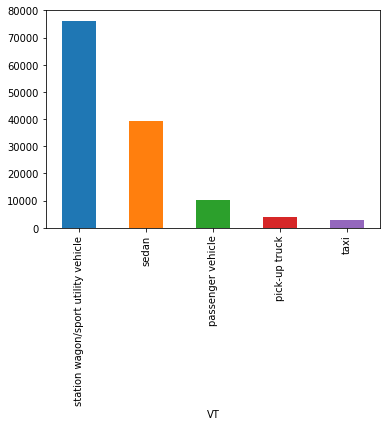

NEXT

MANHATTAN
VT
station wagon/sport utility vehicle    48731
sedan                                  20727
taxi                                   11955
passenger vehicle                       5627
box truck                               3545
Name: VT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


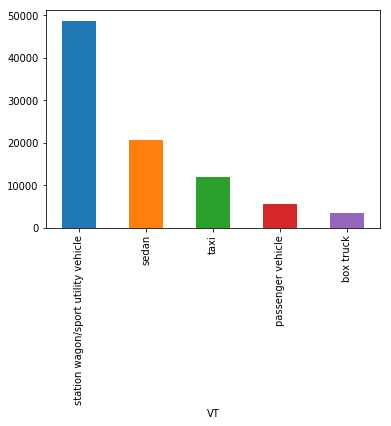

NEXT

QUEENS
VT
station wagon/sport utility vehicle    67085
sedan                                  35103
passenger vehicle                       8952
pick-up truck                           3912
taxi                                    2268
Name: VT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


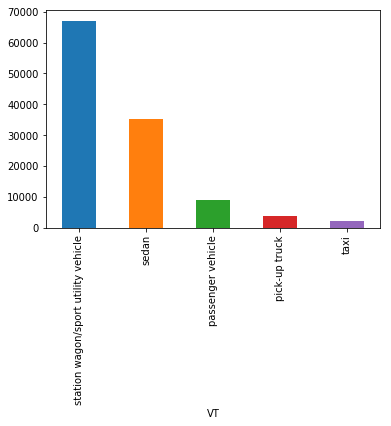

NEXT

STATEN ISLAND
VT
station wagon/sport utility vehicle    8687
sedan                                  4773
passenger vehicle                      1531
pick-up truck                           694
bus                                      93
Name: VT, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


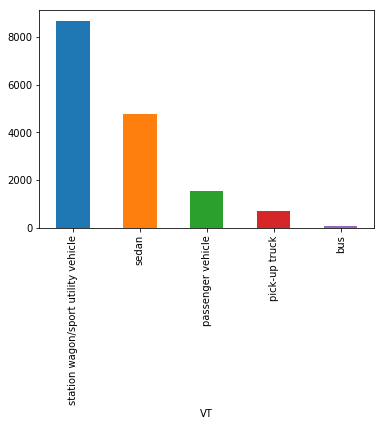

NEXT



In [295]:
#create individual dataframes of in preparation for concatenating vehicle types
v1 = df_copy[['BOROUGH', 'VEHICLE TYPE CODE 1']]
v2 = df_copy[['BOROUGH', 'VEHICLE TYPE CODE 2']]
v3 = df_copy[['BOROUGH', 'VEHICLE TYPE CODE 3']]
v4 = df_copy[['BOROUGH', 'VEHICLE TYPE CODE 4']]
v5 = df_copy[['BOROUGH', 'VEHICLE TYPE CODE 5']]

#reset index
v1 = v1.reset_index()
v2 = v2.reset_index()
v3 = v3.reset_index()
v4 = v4.reset_index()
v5 = v5.reset_index()

#define columns to be included in new df post-concatenation

v1.columns = ['index', 'BOROUGH', 'VT']
v2.columns = ['index', 'BOROUGH', 'VT']
v3.columns = ['index', 'BOROUGH', 'VT']
v4.columns = ['index', 'BOROUGH', 'VT']
v5.columns = ['index', 'BOROUGH', 'VT']

#concatenate vehicle types
all_vehicles = pd.concat([v1, v2, v3, v4, v5])
all_vehicles

#simple data cleansing, convert all vehicle types to lower case and combine the two station wagon labels
all_vehicles['VT'] = all_vehicles['VT'].str.lower()
station_wagon = all_vehicles['VT'].str.contains('station')
all_vehicles['VT'] = numpy.where(station_wagon, 'station wagon/sport utility vehicle', all_vehicles['VT'])

#remove duplicates
drop_dup_vehicles = all_vehicles.drop_duplicates()
new_vehicles = drop_dup_vehicles.groupby('BOROUGH')

#graph top five vehicle types resulting in accidents across each borough
for i in new_vehicles:
    a = i[1].groupby('VT')['VT'].count()
    a = a.sort_values(ascending = False).head(5)
    print(i[0])
    print(a)
    print(a.plot.bar())
    plt.show()
    print('NEXT\n')

<h3>Exercise 11 :</h3>
<p>In a 2018 <a href="https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html">interview</a> with The New York Times, New York's mayor de Blasio stated that <em>'Vision Zero is clearly working'</em>. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by <a href="https://www.amny.com/news/vision-zero-de-blasio-1-30707464/">am New York Metro</a>, the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.</p>
<p>How would you use the provided data to understand what went wrong in the first quarter of 2019?</p>
<blockquote>
<ul>
<li>
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Answer.**
<p>[ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. </p>
</li>
<li>
<p>[ x ] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    </p>
</li>
<li>
<p>[ ] The provided data is insufficient to improve our understanding of the situation.</p>
</li>
<li>
<p>[ ] None of the above. I would do the following: <em>here your recommended answer</em>.</p>
</li>
</ul>
</blockquote>

**Additional Note:** I would also look into the data quality (i.e. missing values) present in both the 2018 and 2019 data to see if the story is at all being skewed due to missing values and/or unspecified accident details. Also, I think it's important to look into the information provided in option 1 (quarterly data comparison), but know that this information is not sufficient to be the sole source of insights for measuring success on *Vision Zero*.

<h3>Exercise 12 :</h3>
<p>Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?</p>
<p><strong>For example,</strong> if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.</p>
<p><strong>Hint:</strong> You may want to create a new column with the total number of kills in the accident. For that you may find the function <code>.to_numpy()</code> useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. </p>

**Answer.**

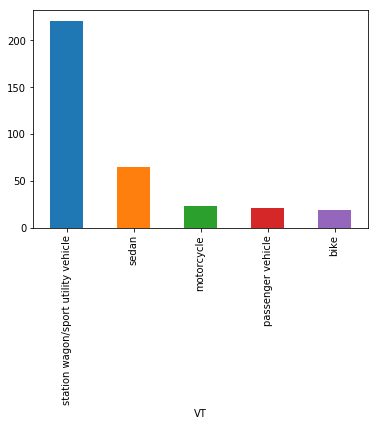

VT
station wagon/sport utility vehicle    221
sedan                                   65
motorcycle                              23
passenger vehicle                       21
bike                                    19
Name: TOTAL KILLED, dtype: int64

In [10]:
#create column Total Killed to combine column values that record the amount of deaths per incident
df_copy['TOTAL KILLED'] = df_copy['NUMBER OF MOTORIST KILLED'] + df_copy['NUMBER OF CYCLIST KILLED'] + df_copy['NUMBER OF PEDESTRIANS KILLED']

only_fatal = df_copy['TOTAL KILLED'] > 0 

df_deadly = df_copy[only_fatal]

#create individual dataframes of in preparation for concatenating vehicle types and fatalities
vdeaths1 = df_deadly[['VEHICLE TYPE CODE 1', 'TOTAL KILLED']]
vdeaths2 = df_deadly[['VEHICLE TYPE CODE 2', 'TOTAL KILLED']]
vdeaths3 = df_deadly[['VEHICLE TYPE CODE 3', 'TOTAL KILLED']]
vdeaths4 = df_deadly[['VEHICLE TYPE CODE 4', 'TOTAL KILLED']]
vdeaths5 = df_deadly[['VEHICLE TYPE CODE 5', 'TOTAL KILLED']]

#reset indexes
vdeaths1 = vdeaths1.reset_index()
vdeaths2 = vdeaths2.reset_index()
vdeaths3 = vdeaths3.reset_index()
vdeaths4 = vdeaths4.reset_index()
vdeaths5 = vdeaths5.reset_index()

#define columns to be included in new df post-concatenation
vdeaths1.columns = ['index', 'VT', 'TOTAL KILLED']
vdeaths2.columns = ['index', 'VT', 'TOTAL KILLED']
vdeaths3.columns = ['index', 'VT', 'TOTAL KILLED']
vdeaths4.columns = ['index', 'VT', 'TOTAL KILLED']
vdeaths5.columns = ['index', 'VT', 'TOTAL KILLED']

#concatenate total fatalities across vehicle types
all_deaths = pd.concat([vdeaths1, vdeaths2, vdeaths3, vdeaths4, vdeaths5])
all_deaths

#simple data cleansing, convert all vehicle types to lower case and combine the two station wagon labels
all_deaths['VT'] = all_deaths['VT'].str.lower()
station_wagon = all_deaths['VT'].str.contains('station')
all_deaths['VT'] = numpy.where(station_wagon, 'station wagon/sport utility vehicle', all_deaths['VT'])

#remove duplicates and plot top five vehicles resulting in fatalities
all_deaths_drop = all_deaths.drop_duplicates()
new_all_deaths = all_deaths_drop.groupby('VT')['TOTAL KILLED'].sum().sort_values(ascending = False).head(5)
new_all_deaths.plot.bar(legend=None, y='TOTAL KILLED')
plt.show()

#print(new_all_deaths.pct_change())
new_all_deaths